In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style("whitegrid")

# Load Data

In [4]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


# Data Characteristic

In [6]:
print(f'Observation shape: {observations.shape}')
print(f'Species shape: {species.shape}')

Observation shape: (23296, 3)
Species shape: (5824, 4)


In [7]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [8]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


# Data Exploration

In [9]:
print(f'Number of parks: {observations.park_name.nunique()}')
print(f'Parks: {observations.park_name.unique()}')

Number of parks: 4
Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [10]:
print(f'Number of observations: {observations.observations.sum()}')

Number of observations: 3314739


In [11]:
print(f'Number of species: {species.scientific_name.nunique()}')

Number of species: 5541


In [12]:
print(f'Number of category: {species.category.nunique()}')
print(f'Categories: {species.category.unique()}')

Number of category: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [13]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [14]:
print(f'Number of conservation status: {species.conservation_status.nunique()}')
print(f'Conservation statuses: {species.conservation_status.unique()}')

Number of conservation status: 4
Conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [15]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [16]:
print(f'Number of null value: {species.conservation_status.isna().sum()}')

Number of null value: 5633


Terdapat 5633 baris dengan nilai null pada kolom 'conservation_status' pada dataset species.

# Analysis

Karna banyak baris dengan kolom 'conservation_status' bernilai 'nan' maka akan dilakukan perubahan/pengisian data dengan merubah nilai 'nan' menjadi 'No Intervention'.

In [17]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

## 1. What is the distribution of conservation_status for animals?

In [18]:
conservationCategory = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category']).scientific_name.count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Distribution of Conservation Status')

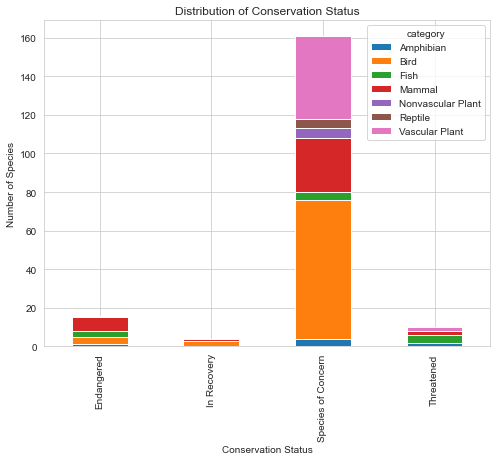

In [19]:
ax = conservationCategory.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
ax.set_title('Distribution of Conservation Status')

## 2. Are certain types of species more likely to be endangered?

In [20]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [21]:
category_protected = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_protected.columns = ['category', 'not_protected', 'protected']
category_protected

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [22]:
category_protected['percentage_protected'] = category_protected.protected / (category_protected.not_protected + category_protected.protected) * 100
category_protected

,category,not_protected,protected,percentage_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


## 3. Are the differences between species and their conservation status significant?

Pada bagian ini akan digunakan Hypothesis Testing dengan menggunakan chi-squared untuk mengetahui apakah perbedaan antar spesies dan status konservasinya signifikan.

In [23]:
from scipy.stats import chi2_contingency

Perbandingan pertama adalah category 'Mammal' dengan 'Bird'.

Dengan significant threshold 0.05.

Tabel contigency 'Mammal' dan 'Bird' akan berbentuk seperti ini:

|        | Protected | Not Protected |
|--------|-----------|---------------|
| Mammal |    30     |       146     |
| Bird   |    74     |      413      |

In [29]:
contigency_mb = [[30, 146],
                [74, 413]]

In [30]:
chi2, pval, dof, expected = chi2_contingency(contigency_mb)

print(f'P-Value: {pval}')
print(expected)

P-Value: 0.6472413381137023
[[ 27.60784314 148.39215686]
 [ 76.39215686 410.60784314]]


Perbedaan antara spesies 'Mammal' dan 'Bird' ***Tidak Signifikan***,

karena p-value yang didapat adalah 0.65 dan tidak lebih kecil dari 0.05.

Perbandingan berikutnya adalah category 'Mammal' dan 'Reptile'.

Tabel contigency 'Mammal' dan 'Reptile' akan berbentuk seperti ini:

|        | Protected | Not Protected |
|--------|-----------|---------------|
| Mammal |    30     |       146     |
| Reptile|    5      |      73       |

In [31]:
contigency_mr = [[30, 146],
                [5, 73]]

In [32]:
chi2, pval, dof, expected = chi2_contingency(contigency_mr)

print(f'P-Value: {pval}')
print(expected)

P-Value: 0.03835559022969898
[[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]


Perbedaan antara spesies 'Mammal' dan 'Reptile' ***Signifikan***,

karena p-value yang didapat adalah 0.038 yang mana lebih kecil dari significant threshold yaitu 0.05.

## 4. Which species were spotted the most at each park?